In [8]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Output')
cur_date = "082123"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in file
var_imp_df = data.frame(read_excel("Variable_Importance_082123.xlsx")) 

In [9]:
head(var_imp_df)

,Predictor,Importance,Passed_Filter,Outcome
,<chr>,<dbl>,<chr>,<chr>
1,Longtitude,84.77808,Yes,Detect
2,pH,29.46573,Yes,Detect
3,Casing_Depth,28.49037,Yes,Detect
4,Geology,26.66180,Yes,Detect
5,Latitude,24.24446,Yes,Detect
6,Flow_Rate,22.03651,Yes,Detect


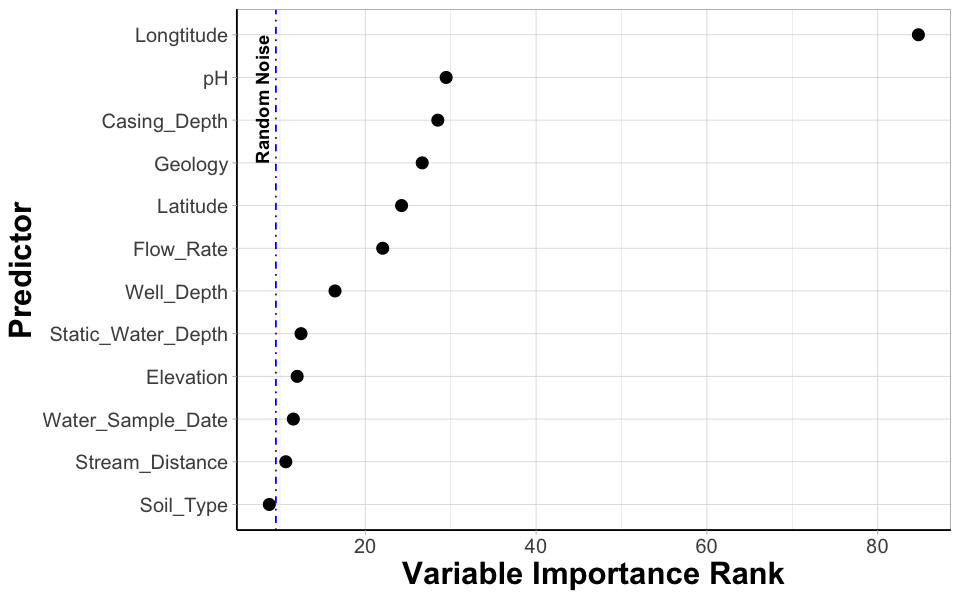

In [25]:
options(repr.plot.width=8, repr.plot.height=5) #changing size

ggplot() + 
  geom_point(data = var_imp_df %>%
                 filter(Outcome == "Detect", !grepl("noise", Predictor)), 
             aes(x = Importance, y = reorder_within(Predictor, Importance, Outcome)), size = 3) + 

  geom_vline(data = var_imp_df %>% 
             filter(Outcome == "Detect", Importance > 9, grepl("noise", Predictor)),
                    aes(xintercept = Importance), color = "blue", linetype = "dotdash") +

  #adding text to verticle background noise lines
  geom_text(data = var_imp_df %>% 
             filter(Outcome == "Detect", Importance > 9, grepl("noise", Predictor)),
            aes(x = Importance, label = "Random Noise\n", y = 10.5), angle = 90, fontface = "bold") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  #facet_wrap(~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none")